# Welcome to Split 3

You have learnt too much about coding in Split 2 and here comes your time to see how far you have learnt.


You also learnt a cool amount of Statisitcs Let's Start building together a **Simple Linear Regression** Model From Scratch.

# FOLLOW THESE STEPS 

**First** : Let me Put You on the Road.

If you are using Google Colab please Execute the following Code in next Cell  , so you will give the Permission for Google Colab to Access your folders in Google Drive 

***DO NOT RUN IT IF YOU ARE ON JUPYTER ***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('drive/MyDrive/Fusion')

In [ ]:
!ls

Insurance.xlsx


**Second**  Let's Install Our Dependencies 
`xlrd` is used for  Reading Excel Files 


In [ ]:
!pip install --upgrade xlrd 


     |████████████████████████████████| 96 kB 2.7 MB/s 
  Attempting uninstall: xlrd
    Found existing installation: xlrd 1.1.0
    Uninstalling xlrd-1.1.0:
      Successfully uninstalled xlrd-1.1.0


**Third** : Let's Now Import the Packages that we are going to use 

In [ ]:
import numpy as np   # For Matrices Manipulations
import pandas as pd  # For Data frames etc 
import openpyxl   # For Excel Files
import os   # For Changing to the Correct Directory 

In [ ]:
!ls            #  its an Order to List all files in the Current Directory You are in 

Insurance.xlsx


**Forth** :  Type a Code to Read  The Excel File 
hint go and use `pd.read_excel`

In [ ]:
df = pd.read_excel('Insurance.xlsx', engine = 'openpyxl')
df.head()

,X,Y
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


So this Data is about:-

Auto Insurance in Sweden
In the following data

X = number of claims

Y = total payment for all the claims in thousands of Swedish Kronor

for geographical zones in Sweden
Reference: Swedish Committee on Analysis of Risk Premium in Motor Insurance



**Fifth** Type a Code  that Change the Features and Labels  from pandas frame into Numpy Arrays.

*40 rows only* for **Training** and the Rest for **Testing**
hint : use `df.iloc` ,`.values` 

In [ ]:
train_df = df.iloc[:40,:]
test_df = df.iloc[40:,:]

In [ ]:
X_train = train_df['X'].values
y_train = train_df['Y'].values
X_test = test_df['X'].values
y_test = test_df['Y'].values

**Sixth** Check the Type and Size of the Arrays you created by Printing them.
hint Go and use :  `shape` , `type` 

In [ ]:
print('The Features to be trained on :', X_train.shape)
print('The Labels to be trained on :', y_train.shape)
print('The Features to be tested on :', X_test.shape)
print('The Labels to be tested on :', y_test.shape)
print('X_train type : ', type(X_train), '\nX_test type :',type(X_test) ,'\ny_train type :', type(y_train) , '\ny_test type :', type(y_test))

The Features to be trained on : (40,)
The Labels to be trained on : (40,)
The Features to be tested on : (23,)
The Labels to be tested on : (23,)
X_train type :  <class 'numpy.ndarray'> 
X_test type : <class 'numpy.ndarray'> 
y_train type : <class 'numpy.ndarray'> 
y_test type : <class 'numpy.ndarray'>


**Seventh** Let me do this for you  but watch me properly, its for Visualization.

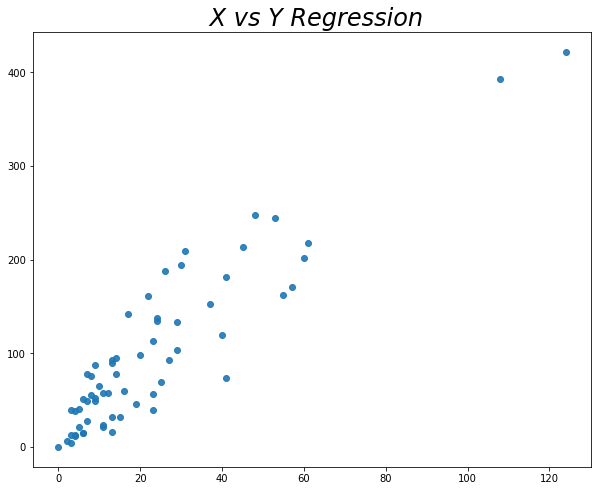

In [ ]:
import matplotlib.pyplot as plt # A Great Package For Plotting and Visualization 
plt.figure(figsize=(10,8))     # The Plotting Window Size 
plt.title(' X vs Y Regression', fontsize=24 , fontstyle='italic')  # Title , Font size and Style 
plt.scatter(df['X'] ,df['Y'] , alpha =0.9, label='Y')  # NOTE : Make Sure  x_train , y_train  IN Data Type ( Array )
plt.show()   # Showing the Result of plotting 

Hungry for Statistics ?
Okey Let's Go for it, But Do you even remember the Expressions?

**Eighth** ? I don't know how to type this  but i meant 8th
Okey, Whatever Just Go and build a Function Mean Squared Error and call it `MSE()` That Takes a List of Actual Values and List of Predicted Values  then Returning the Mean Squared Error between them 


In [ ]:
def MSE(actual, predicted):
  actual, predicted = np.array(actual), np.array(predicted)
  return np.square(np.subtract(actual,predicted)).mean()


**Ninth** Build  Following Functions:

1- `Mean()`  its input :  Values ,  its Ouput : Mean of the Values.

2- `Variance()` its input : Values, Mean , its Output : Variance of the Values.

3- `Covariance()` its input : Values of X, X_mean , y_mean ,y, its Output : Covariance of X and Y.



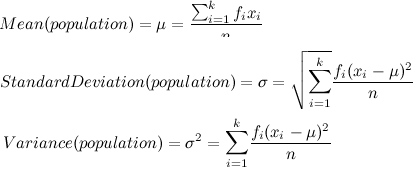

In [ ]:

def Mean(values):
  return np.sum(values)/len(values)
def Variance(values, mean):
  return sum([(x - mean)**2 for x in values])  
def Covariance(x, X_mean , y , y_mean):
  cov = 0.0
  for i in range(len(x)):
    cov += (x[i] - X_mean) * (y[i] - y_mean) 
  return cov

In [ ]:
#Calculate mean and variance
mean_x , mean_y = Mean(X_train), Mean(y_train)
var_x , var_y = Variance(X_train,mean_x) , Variance(y_train, mean_y)

In [ ]:
print( "X:\n" "mean : {}".format(mean_x) + "\nvariance: {}".format(var_x))
print('---------------------')
print( "Y:\n" "mean : {}".format(mean_y) + "\nvariance: {}".format(var_y))

X:
mean : 21.625
variance: 693.784375
---------------------
Y:
mean : 86.20250000000001
variance: 9125.632243750002


In [ ]:
# Calculate covariance
covariance = Covariance(X_train, mean_x, y_train, mean_y)
print("covariance: {}".format(covariance))

covariance: 96270.3375


**Tenth** : watch out for a Sensitive Point you now need to build a Function that will use  the Previous Functions to return the Co-efficents of the Best Fit Line  which  is Beta Zero and Beta One 

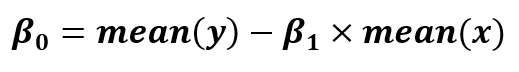


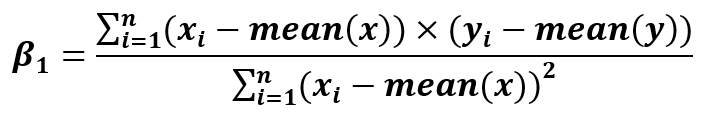

Alternate way for Beta One 


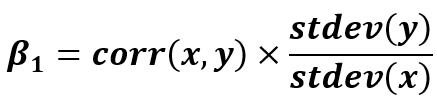

In [ ]:
def coefficents(X_train):
    b1 = covariance / var_x
    b0 = mean_y - b1 * mean_x
    return [b0, b1]

**Eleventh**: Build a function  that will take the Input Training Data and Testing the Data , Then call the Co efficient Function with the Training Data to get the Co efficents then use it for Building the Best fit Line and return the Predictions of the Test set 


In [ ]:
def SimpleLinearRegression(train, test):
  pred = list()
  b0, b1 = coefficents(train)
  for i in test:
    yhat = b0 + b1 * i
    pred.append(yhat)
  return pred

predictions = SimpleLinearRegression(X_train,X_test)
predictions

[56.28212088590207,
 219.32650562359524,
 153.41494583601715,
 139.5388279860007,
 201.9813583110747,
 153.41494583601715,
 49.344061960893846,
 104.8485333609596,
 38.93697357338152,
 21.59182626086097,
 70.1582387359185,
 56.28212088590207,
 56.28212088590207,
 63.22017981091029,
 38.93697357338152,
 111.78659228596783,
 115.25562174847194,
 94.44144497344728,
 42.40600303588563,
 118.72465121097605,
 59.75115034840618,
 195.04329938606648,
 101.3795038984555]

In [ ]:
y_test

array([ 89.9, 202.4, 181.3, 152.8, 162.8,  73.4,  21.3,  92.6,  76.1,
        39.9, 142.1,  93. ,  31.9,  32.1,  55.6, 133.3, 194.5, 137.9,
        87.4, 209.8,  95.5, 244.6, 187.5])

**Twelveth**: Finally Build a Function that Calls The `MSE` function and the `SimpleLineRegression` Function and use it to Print the Result as an Evaluation for the model

In [ ]:
def Evaluate():
  return MSE(y_test,predictions)
Evaluate()

2235.903859595707

Let me Now visualize your work for you ! Just help me with the Naming

<function matplotlib.pyplot.show>

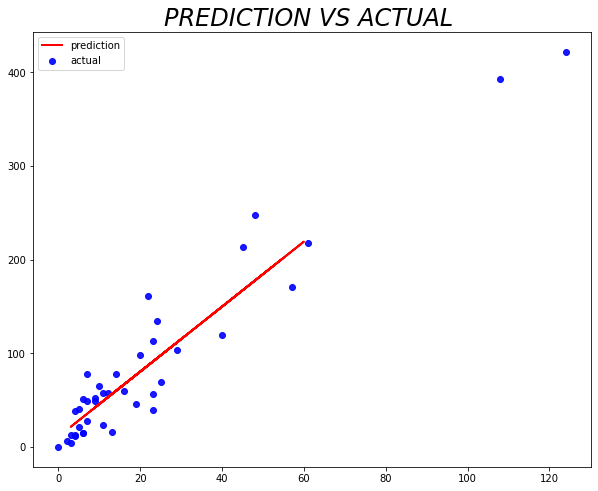

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.title('PREDICTION VS ACTUAL ', fontsize=24 , fontstyle='italic')
plt.scatter(X_train,y_train , alpha =0.9, c='b', label='actual')
plt.plot(X_test,predictions, linewidth=2.0,c='r', label='prediction')  ## REPLACE X AND Y WITH  X_test AND PREDS ARRAYS! 
plt.legend(loc='upper left')
plt.show

You 've done So *GREAT* today !
# Thank You